In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
carData = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv")

In [5]:
carData.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [25]:
strings = list(carData.dtypes[carData.dtypes == object].index)
for col in strings: 
    carData[col] = carData[col].str.lower().str.replace(" ", "_")
carData.columns = carData.columns.str.lower().str.replace(' ', '_')

In [26]:
for col in carData.columns:
    print(col, carData[col].unique()[:5], carData[col].nunique())

make ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 48
model ['1_series_m' '1_series' '100' '124_spider' '190-class'] 914
year [2011 2012 2013 1992 1993] 28
engine_fuel_type ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 10
engine_hp [335. 300. 230. 320. 172.] 356
engine_cylinders [ 6.  4.  5.  8. 12.] 9
transmission_type ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 5
driven_wheels ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 4
number_of_doors [ 2.  4.  3. nan] 3
market_category ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] 71
vehicle_size ['compact' 'midsize' 'large'] 3
vehicle_style ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] 16
highway_mpg [26 28 27 25 24] 59
city_mpg [19 20 18 17 16] 69
popularity [3916 3105  819  617 1013] 48
msrp [46135 40650 36350 29450 34500] 6049


In [20]:
sns.histplot(carData.msrp[carData.msrp<100000], bins=50)

AttributeError: 'DataFrame' object has no attribute 'msrp'

<Axes: xlabel='msrp', ylabel='Count'>

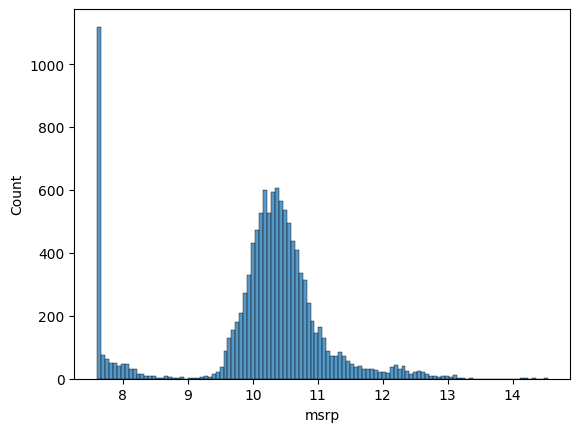

In [27]:
price_logs = np.log1p(carData.msrp)
sns.histplot(price_logs)

In [28]:
n  = len (carData)
n_val = int(n * 0.2)
n_test = int(n*0.2)
n_train = n - n_val-n_test

perm = np.random.permutation(n)
trainData, testData, valData = carData.iloc[perm[:n_train]], carData.iloc[perm[n_train: n_train+n_test]], carData.iloc[perm[-n_val:]]

In [29]:
trainData= trainData.reset_index(drop=True)
testData = testData.reset_index(drop=True)
valData = valData.reset_index(drop=True)

In [31]:
y_train = np.log1p(trainData.msrp.values)
y_test = np.log1p(testData.msrp.values)
y_val = np.log1p(valData.msrp.values)

In [2]:
def train_linearreg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = np.matmul(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    w =  np.matmul(np.matmul(XTX_inv, X.T), y)
    return w[0], w[1:]
def prep_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df_num = df[base]
    df_num = df_num.fillna(0)
    return df_num.values

In [44]:
X_train = prep_X(trainData)
w_0, w = train_linearreg(X_train, y_train)

In [46]:
y_pred = w_0 + np.matmul(X_train, w)

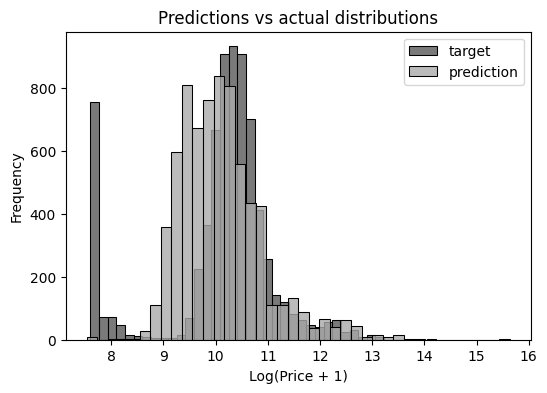

In [48]:
plt.figure(figsize=(6,4))
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distributions')
plt.show()

In [8]:
def rmse(y, y_pred):
    diff = y - y_pred
    return (np.matmul(diff.T, diff)/len(diff)).item()
   

In [71]:
rmse(y_train, y_pred)

0.569199162855279

In [72]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    features = base.copy()
    features.append('age')
    df['age'] = 2017 - df.year
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values() 
    return X 

In [3]:
effData = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [74]:
effData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

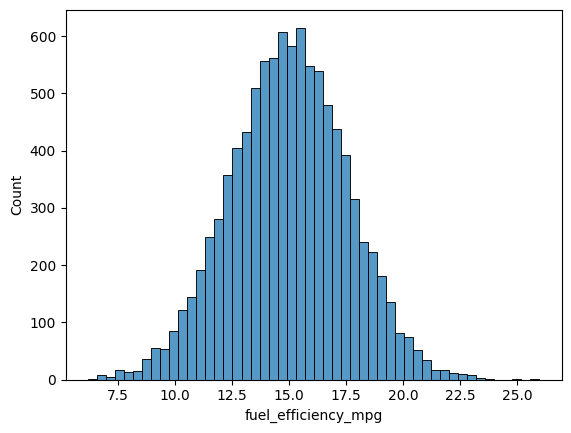

In [ ]:
sns.histplot(effData.fuel_efficiency_mpg, bins=50)

In [4]:
effData = effData[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
effData.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [78]:
effData.horsepower.median()

np.float64(149.0)

In [5]:
np.random.seed(42)
idx = np.arange(len(effData))
np.random.shuffle(idx)
n = len(effData)
print(idx)
idx_train, idx_v, idx_test = idx[:int(n*0.6)], idx[int(n*0.6): int(n*0.8)], idx[int(n*0.8):]
d_train , d_val, d_test = effData.iloc[idx_train], effData.iloc[idx_v], effData.iloc[idx_test]

[ 483 7506 8795 ... 5390  860 7270]


In [90]:
d_train.head(1)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943


In [11]:
df = d_train.fillna(0)
df_v = d_val.fillna(0)
y_train = df.fuel_efficiency_mpg
y_val = d_val.fuel_efficiency_mpg
del df['fuel_efficiency_mpg']
del df_v['fuel_efficiency_mpg']


In [9]:
w0, w = train_linearreg(df, y_train)
y_pred = np.matmul(df_v, w) + w0 
rmse(y_pred, y_val)


0.21478198670974327

In [38]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [12]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(df, y_train, r=r)
    y_pred = np.matmul(df_v, w) + w0 
    rm = rmse(y_pred, y_val)
    print('%5s, %.2f' % (r, rm))


    0, 0.28
0.001, 0.56
 0.01, 16.25
  0.1, 312.77
    1, 738.83
   10, 825.29


In [29]:
vals = np.array([], dtype=np.float128) 
for seeed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    np.random.seed(seeed)
    idx = np.arange(len(effData))
    np.random.shuffle(idx)
    n = len(effData)
    idx_train, idx_v, idx_test = idx[:int(n*0.6)], idx[int(n*0.6): int(n*0.8)], idx[int(n*0.8):]
    d_train , d_val, d_test = effData.iloc[idx_train], effData.iloc[idx_v], effData.iloc[idx_test]
    df = d_train.fillna(0)
    df_v = d_val.fillna(0)
    y_train = df.fuel_efficiency_mpg
    y_val = d_val.fuel_efficiency_mpg
    del df['fuel_efficiency_mpg']
    del df_v['fuel_efficiency_mpg']
    w0, w = train_linearreg(df, y_train)
    y_pred = np.matmul(df_v, w) + w0 
    print(rmse(y_pred, y_val))
    vals = np.append(vals, rmse(y_pred, y_val))
round(vals.std(), 3)



0.2716743173412933
0.27226720502776003
0.27345818925676163
0.2663958282751185
0.26117776273328386
0.2794189072108857
0.28322202703491683
0.25955151150840416
0.26511820836918876
0.26317051401563096


np.longdouble('0.007')

In [39]:
np.random.seed(9)
idx = np.arange(len(effData))
np.random.shuffle(idx)
n = len(effData)
idx_train, idx_test = idx[:int(n*0.8)], idx[int(n*0.8):]
d_train, d_test = effData.iloc[idx_train], effData.iloc[idx_test]
df = d_train.fillna(0)
df_test = d_test.fillna(0)
y_train = df.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg
del df['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
w0, w = train_linear_regression_reg(df, y_train, 0.001)
y_pred = np.matmul(df_test, w) + w0 
print(rmse(y_pred, y_test))


0.2658810456978741


array([1.], dtype=float128)